In [ ]:
import pandas as pd
import seaborn as sns


# Loading & Exploring Dataset

In [ ]:
df=pd.read_csv('data.csv')

In [ ]:
df.head()

,UserID,SessionID,Timestamp,EventType,ProductID,Amount,Outcome
0,1,1,2024-07-07 18:00:26.959902,page_view,NaN,NaN,NaN
1,1,1,2024-03-05 22:01:00.072000,page_view,NaN,NaN,NaN
2,1,1,2024-03-23 22:08:10.568453,product_view,prod_8199,NaN,NaN
3,1,1,2024-03-12 00:32:05.495638,add_to_cart,prod_4112,NaN,NaN
4,1,1,2024-02-25 22:43:01.318876,add_to_cart,prod_3354,NaN,NaN


In [ ]:
df.tail()

,UserID,SessionID,Timestamp,EventType,ProductID,Amount,Outcome
74812,1000,10,2024-05-11 22:48:45.500117,purchase,prod_1238,186.208225,purchase
74813,1000,10,2024-03-29 04:09:32.514318,logout,NaN,NaN,NaN
74814,1000,10,2024-02-09 02:58:56.128697,login,NaN,NaN,NaN
74815,1000,10,2024-04-30 16:19:48.002633,purchase,prod_2515,198.757849,purchase
74816,1000,10,2024-04-01 02:19:29.148727,logout,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74817 entries, 0 to 74816
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UserID     74817 non-null  int64  
 1   SessionID  74817 non-null  int64  
 2   Timestamp  74817 non-null  object 
 3   EventType  74817 non-null  object 
 4   ProductID  32113 non-null  object 
 5   Amount     10682 non-null  float64
 6   Outcome    10682 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.0+ MB


In [ ]:
df.describe()

,UserID,SessionID,Amount
count,74817.000000,74817.000000,10682.000000
mean,500.740741,5.509777,253.189758
std,288.945183,2.869337,143.043974
min,1.000000,1.000000,5.131843
25%,251.000000,3.000000,130.933965
50%,501.000000,6.000000,253.112517
75%,751.000000,8.000000,378.832078
max,1000.000000,10.000000,499.981538


In [ ]:
df.shape

(74817, 7)

In [ ]:
df.columns

Index(['UserID', 'SessionID', 'Timestamp', 'EventType', 'ProductID', 'Amount',
       'Outcome'],
      dtype='object')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.dtypes

,0
UserID,int64
SessionID,int64
Timestamp,object
EventType,object
ProductID,object
Amount,float64
Outcome,object


In [ ]:
df['EventType'].unique()

array(['page_view', 'product_view', 'add_to_cart', 'login', 'click',
       'logout', 'purchase'], dtype=object)

In [ ]:
df['Outcome'].unique()

array([nan, 'purchase'], dtype=object)

In [ ]:
df['ProductID'].unique()

array([nan, 'prod_8199', 'prod_4112', ..., 'prod_8100', 'prod_4989',
       'prod_6787'], dtype=object)

In [ ]:
df['Timestamp']

,Timestamp
0,2024-07-07 18:00:26.959902
1,2024-03-05 22:01:00.072000
2,2024-03-23 22:08:10.568453
3,2024-03-12 00:32:05.495638
4,2024-02-25 22:43:01.318876
...,...
74812,2024-05-11 22:48:45.500117
74813,2024-03-29 04:09:32.514318
74814,2024-02-09 02:58:56.128697
74815,2024-04-30 16:19:48.002633


In [ ]:
# 1. Handle ProductID nulls
df['ProductID'] = df.apply(
    lambda row: "Not Assigned" if pd.isna(row['ProductID']) else row['ProductID'],
    axis=1
)

In [ ]:
# 2. Handle Amount nulls
df['Amount'] = df['Amount'].fillna(0)

In [ ]:
# 3. Create Outcome column based on EventType
event_outcomes = {
    "page_view": "Only page viewed",
    "product_view": "Product viewed",
    "add_to_cart": "Item added to cart",
    "purchase": "Item purchased",
    "login": "User logged in",
    "logout": "User logged out",
    "click": "User clicked"
}

df['Outcome'] = df['EventType'].map(event_outcomes)

In [ ]:
# Convert timestamp to datetime object
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Sort by UserID, SessionID, then Timestamp
df = df.sort_values(by=['UserID', 'SessionID', 'Timestamp'])

# Extract date and hour for analysis
df['Date'] = df['Timestamp'].dt.date
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.day_name()


In [ ]:
df.tail()

,UserID,SessionID,Timestamp,EventType,ProductID,Amount,Outcome,Date,Hour,DayOfWeek
74816,1000,10,2024-04-01 02:19:29.148727,logout,Not Assigned,0.000000,User logged out,2024-04-01,2,Monday
74811,1000,10,2024-04-20 20:35:42.737664,purchase,prod_7326,248.268872,Item purchased,2024-04-20,20,Saturday
74815,1000,10,2024-04-30 16:19:48.002633,purchase,prod_2515,198.757849,Item purchased,2024-04-30,16,Tuesday
74812,1000,10,2024-05-11 22:48:45.500117,purchase,prod_1238,186.208225,Item purchased,2024-05-11,22,Saturday
74810,1000,10,2024-07-13 15:30:59.991899,add_to_cart,prod_1899,0.000000,Item added to cart,2024-07-13,15,Saturday


In [ ]:
df.to_csv('cleaneddata.csv', index=False)

In [ ]:
df.head()

,UserID,SessionID,Timestamp,EventType,ProductID,Amount,Outcome,Date,Hour,DayOfWeek
5,1,1,2024-01-01 23:09:51.956825,page_view,Not Assigned,0.0,Only page viewed,2024-01-01,23,Monday
6,1,1,2024-02-01 05:13:26.944169,add_to_cart,prod_4965,0.0,Item added to cart,2024-02-01,5,Thursday
7,1,1,2024-02-14 15:41:53.071258,login,Not Assigned,0.0,User logged in,2024-02-14,15,Wednesday
4,1,1,2024-02-25 22:43:01.318876,add_to_cart,prod_3354,0.0,Item added to cart,2024-02-25,22,Sunday
1,1,1,2024-03-05 22:01:00.072000,page_view,Not Assigned,0.0,Only page viewed,2024-03-05,22,Tuesday


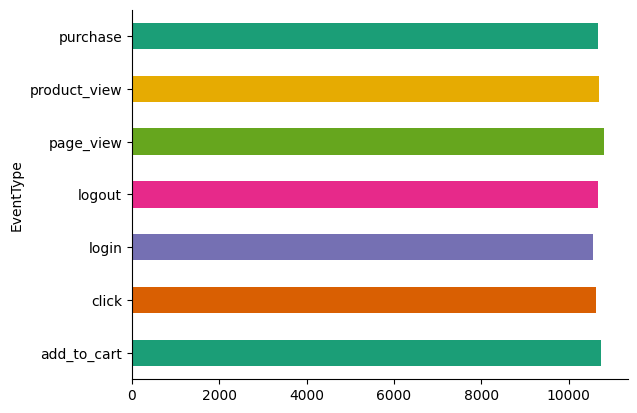

In [ ]:
# @title EventType

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('EventType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['ProductID'].duplicated()

,ProductID
5,False
6,False
7,True
4,False
1,True
...,...
74816,True
74811,True
74815,True
74812,True
